In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
plt.style.use('fivethirtyeight')

In [162]:
df = pd.read_csv('hypothyroid.csv')

In [163]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [164]:
#shape of the dataset
df.shape

(3772, 30)

In [165]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [166]:
df.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

### *Feature Engineering & Exploratory Data Analysis(EDA)*

*Feature Engineering is a process to use domain knowledge in order to derive a new feature or modify existing feature to extract maximum information from it.*

***In Feature Engineering I will perform below operations:-***

1. *I will fetch `Age` using DateofBirth Column.*
2. *I will categories customers based on their `Age`.*

*Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods*

***I will perform below steps in EDA Section:-***
1. *Duplicate data finding*
2. *Analyzing missing values(Missing value imputation).*
3. *Exploring all the features(Categorical & Numerical separately).*
4. *Finding Outliers.*
5. *Finding relationship(Correlation)*

1. *Duplicate data finding*

In [167]:
df.duplicated().sum()

61

    61 Duplicate value. I will drop Those.

In [168]:
df.drop_duplicates(inplace= True)

2. *Analyzing missing values(Missing value imputation).*

In [169]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
binaryClass                  0
dtype: int64

In [170]:
for i in df.columns:
    print(f'Unique values in {i}:-',df[i].unique())

Unique values in age:- ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
Unique values in sex:- ['F' 'M' '?']
Unique values in on_thyroxine:- ['f' 't']
Unique values in query_on_thyroxine:- ['f' 't']
Unique values in on_antithyroid_medication:- ['f' 't']
Unique values in sick:- ['f' 't']
Unique values in pregnant:- ['f' 't']
Unique values in thyroid_surgery:- ['f' 't']
Unique values in I131_treatment:- ['f' 't']
Unique values in query_hypothyroid:- ['f' 't']
Unique values in query_hyperthyroid:- ['f' 't']
Unique values in lithium:- ['f' 't']
Unique values in goitre:- ['f' 

We can see in few of the columns we have `?` which is missing value. I will replace them with `Nan`.

In [171]:
#Let's see how many % of ? in which column
for i in df.columns:
    if df[df[i] == '?'][i].count() > 0:
        print(i,"-",np.round(df[df[i] == '?'][i].count()/df.shape[0]*100,2))

age - 0.03
sex - 4.02
TSH - 8.33
T3 - 19.11
TT4 - 4.61
T4U - 8.81
FTI - 8.76
TBG - 100.0


In [172]:
df.replace('?', np.nan, inplace=True)

<AxesSubplot: >

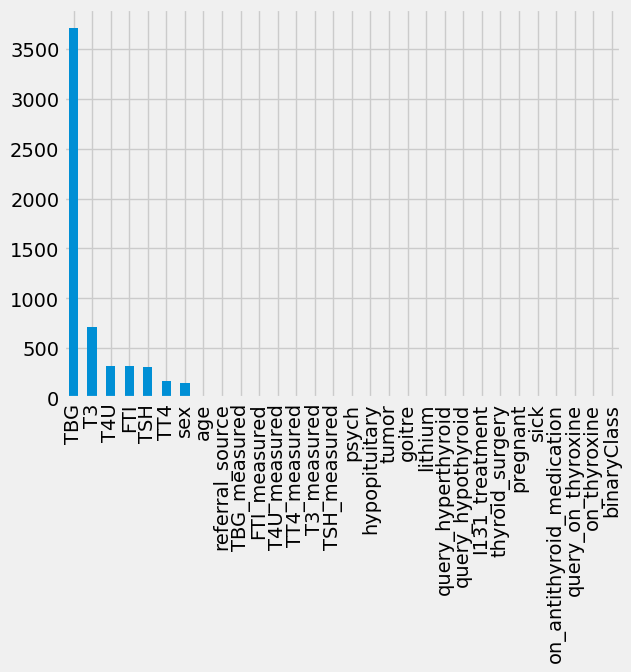

In [173]:
#% Ploting the missing values
df.isna().sum().sort_values(ascending= False).plot(kind = 'bar')

    Since `TBG` has 100% missing value, I will drop it

In [174]:
df.drop('TBG', axis= 1, inplace= True)

Note that if `['TSH_measured','T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']` then its value will be available else not available, Hence thse columns are not required

In [175]:
df.drop([i for i in df.columns if 'measured' in i], axis= 1, inplace= True)

In [176]:
for i in df.columns:
    if df[i].nunique() < 5:
        print(i, df[i].unique())

sex ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
binaryClass ['P' 'N']


In [177]:
df.replace({'f': 0, 't' : 1}, inplace= True)

In [178]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,P
1,23,F,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,P
2,46,M,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,P
3,70,F,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,P
4,70,F,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,1,0,0,NaN,NaN,NaN,NaN,NaN,other,P
3768,68,F,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,SVI,P
3769,74,F,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,other,P
3770,72,M,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,SVI,P


In [179]:
df.replace({'F': 0, 'M' : 1, 'P' : 1, 'N' :0}, inplace= True)

Text(0, 0.5, 'Outcome')

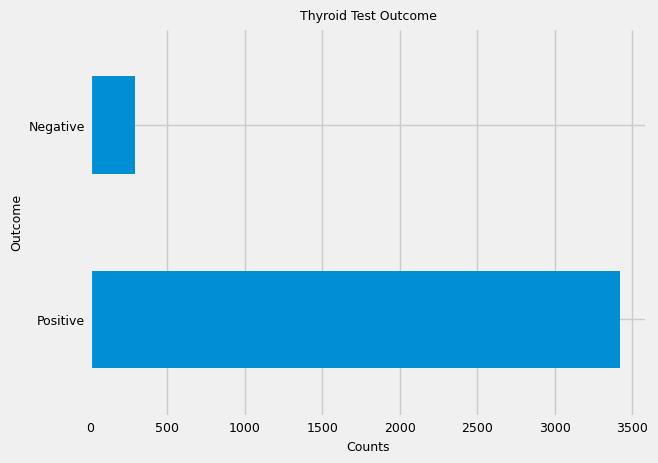

In [180]:
# 'binaryClass' is out outcome variable
df['binaryClass'].replace({ 1 : 'Positive', 0 : 'Negative'}).value_counts().plot(kind= 'barh', fontsize= 9)
plt.title('Thyroid Test Outcome',fontsize = 9)
plt.xlabel('Counts',fontsize = 9)
plt.ylabel('Outcome', fontsize = 9)

Text(0, 0.5, 'Referral Source')

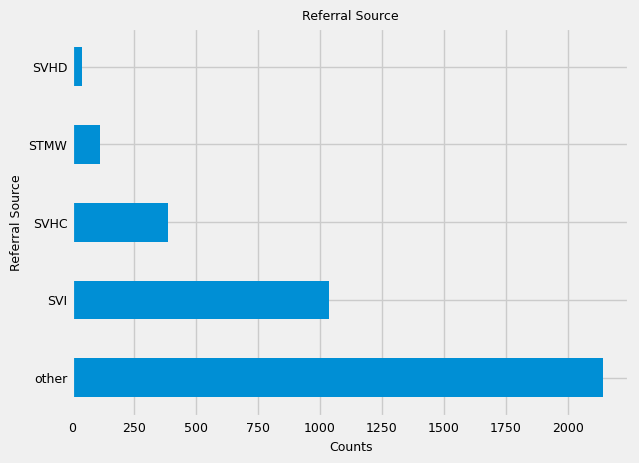

In [181]:
# 'binaryClass' is out outcome variable
df['referral_source'].value_counts().plot(kind= 'barh', fontsize= 9)
plt.title('Referral Source',fontsize = 9)
plt.xlabel('Counts',fontsize = 9)
plt.ylabel('Referral Source', fontsize = 9)

In [183]:
df = pd.get_dummies(df, columns=['referral_source'])


In [184]:
obj_cols = df.columns[df.dtypes.eq('O')]
df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce') # ignore errors
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
binaryClass                    int64
referral_source_STMW           uint8
referral_source_SVHC           uint8
referral_source_SVHD           uint8
referral_source_SVI            uint8
referral_source_other          uint8
d

### *Univariate Analysis*

In [188]:
descrete_features = [i for i in df.columns if df[i].nunique() < 5 and 'referral' not in i]

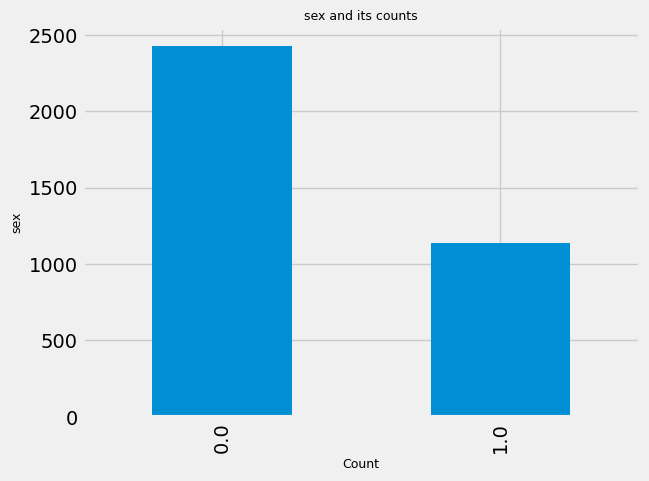

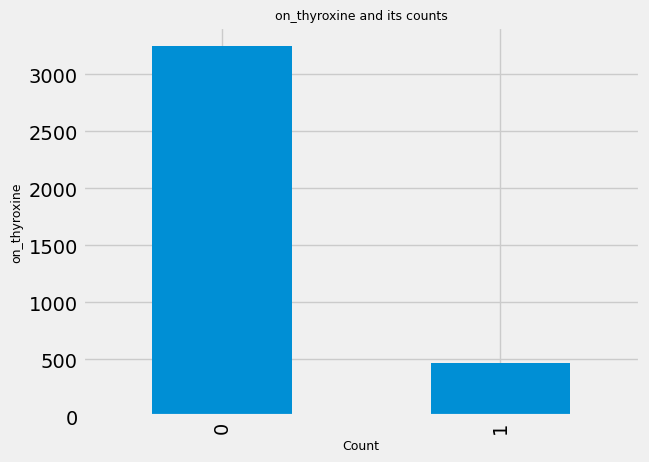

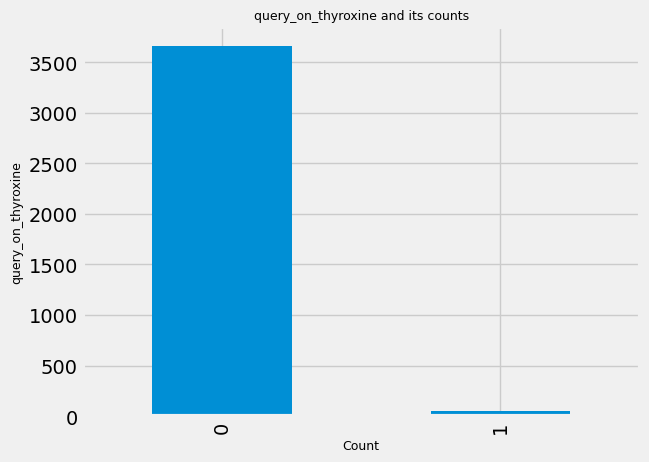

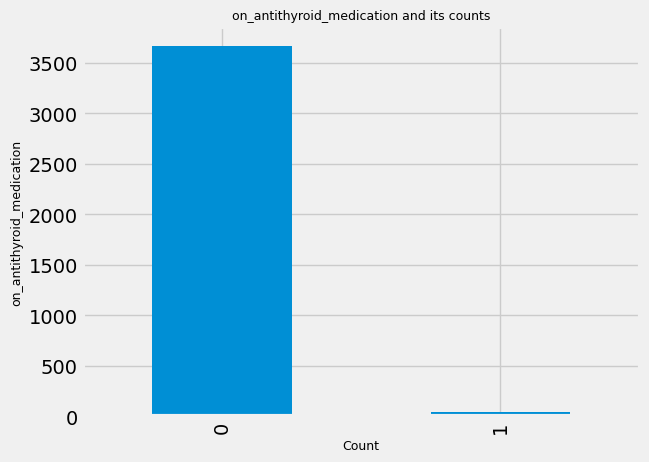

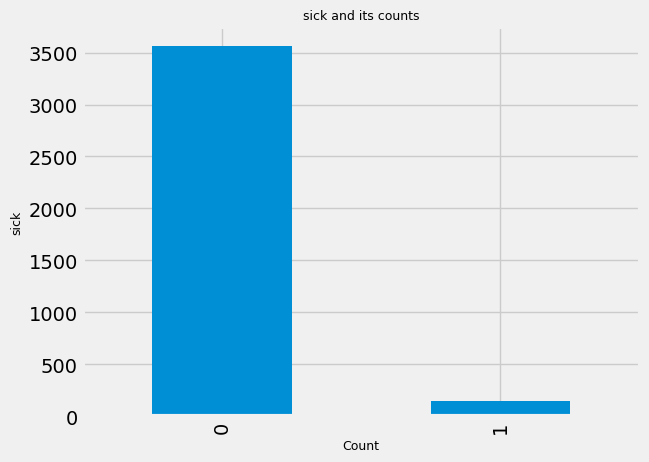

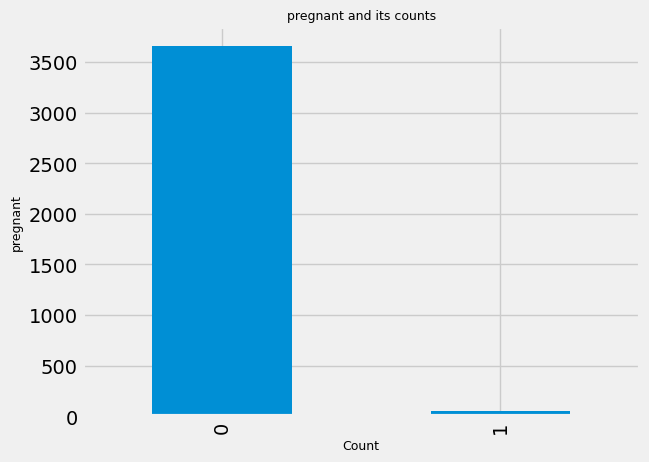

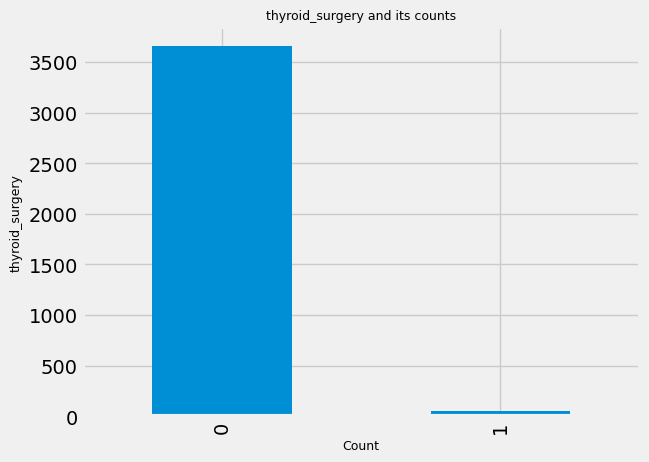

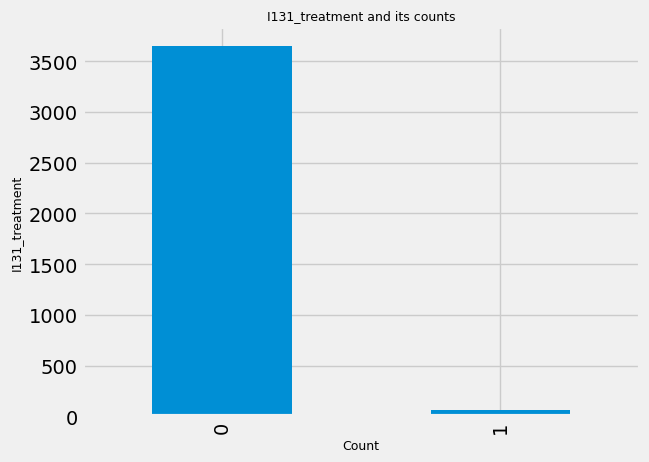

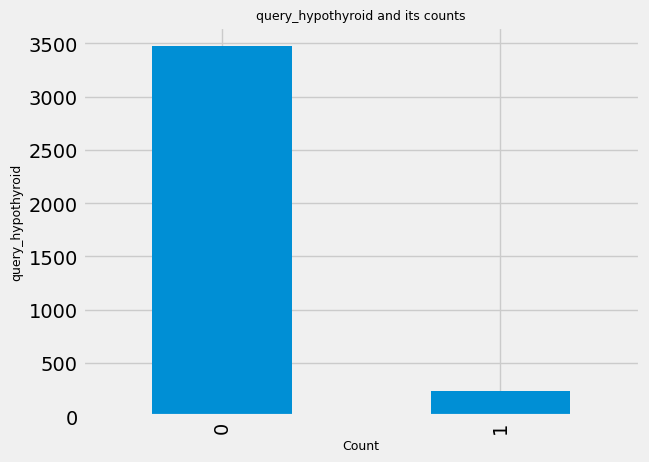

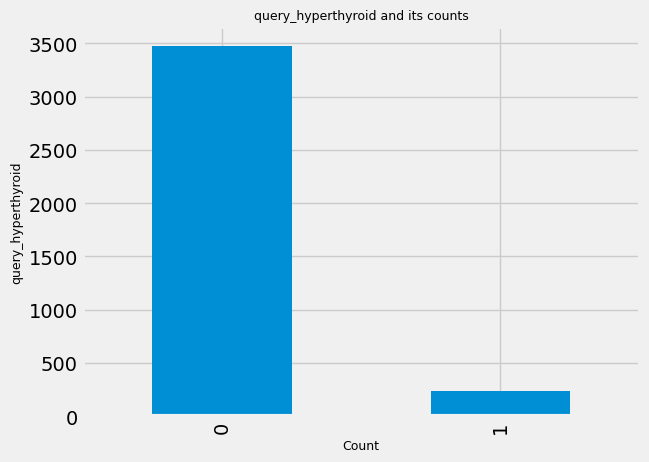

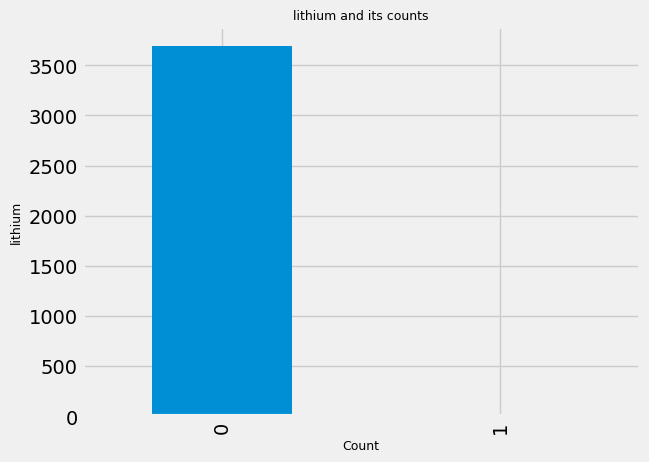

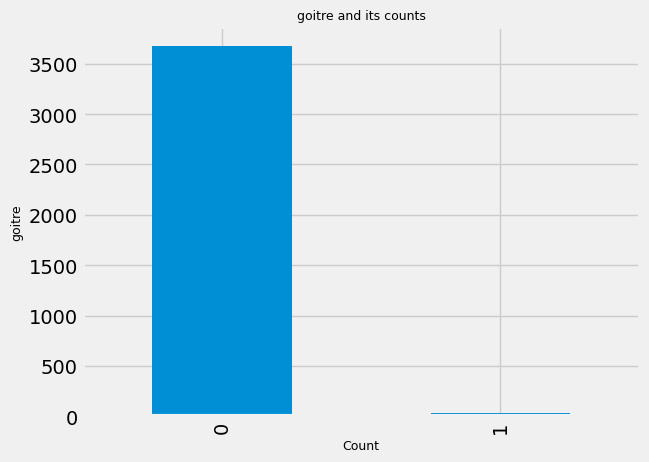

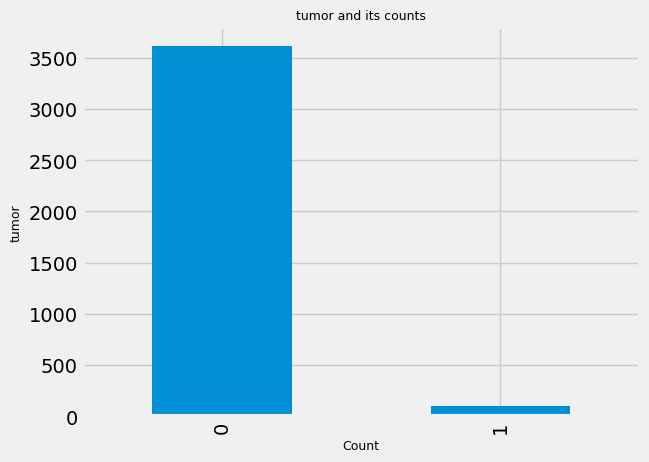

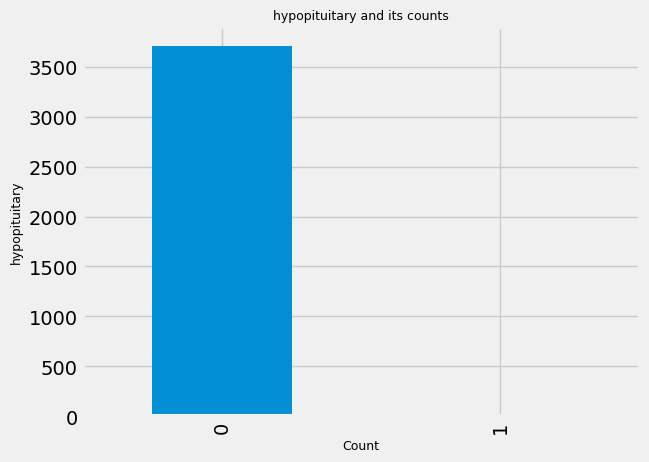

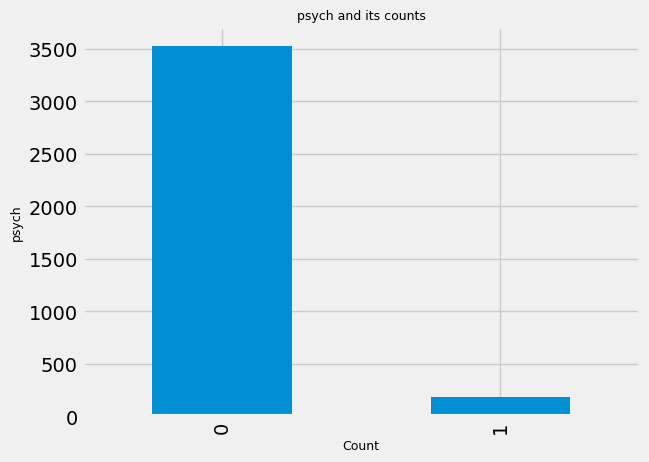

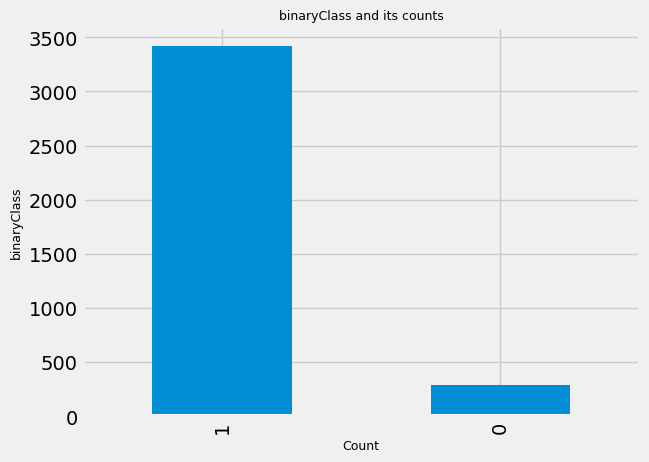

In [196]:
for i in descrete_features:
    df[i].value_counts().plot(kind = 'bar',)
    plt.title(f'{i} and its counts', fontsize = 9)
    plt.xlabel('Count',fontsize = 9)
    plt.ylabel(i,fontsize = 9)
    plt.show()

<AxesSubplot: xlabel='age', ylabel='Density'>

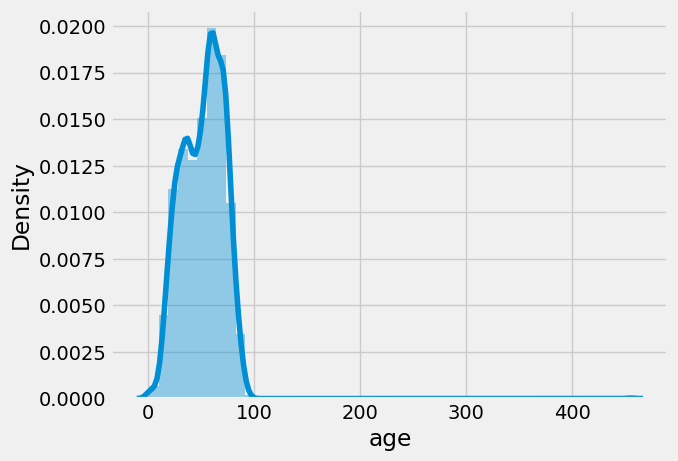

In [ ]:
sns.distplot(df['age'])